In [1]:
import numpy as np
import math

# S形函数
def activation(x):
    return 1 / (1 + math.exp(-x))

inputs = np.array([1, 2, 3, 4])
weights = np.array([0.2, 0.324, 0.1, .001])
bias = 1.5

a = activation(np.dot(inputs.T, weights) + bias)

print(a)

0.9341341524806636


In [0]:
# 导入 numpy 和 matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model, datasets, metrics
# scikit-learn的RBM
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline

In [0]:
!wget https://raw.githubusercontent.com/PacktPublishing/Feature-Engineering-Made-Easy/master/Chapter07/mnist_train.csv

--2018-07-23 03:21:25--  https://raw.githubusercontent.com/PacktPublishing/Feature-Engineering-Made-Easy/master/Chapter07/mnist_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10966012 (10M) [text/plain]
Saving to: ‘mnist_train.csv’

mnist_train.csv     100%[===================>]  10.46M  34.5MB/s    in 0.3s    

2018-07-23 03:21:26 (34.5 MB/s) - ‘mnist_train.csv’ saved [10966012/10966012]



In [0]:
# 从CSV中创建NumPy数组
images = np.genfromtxt('mnist_train.csv', delimiter=',')

In [0]:
# 6000个图像 785列 28x28个像素+1个响应变量
images.shape

(6000, 785)

In [0]:
# 提取XY变量
images_X, images_y = images[:,1:], images[:,0]

# 很大 但是scikit-learn的RBM做0-1正则化
np.min(images_X), np.max(images_X)

(0.0, 255.0)

5.0

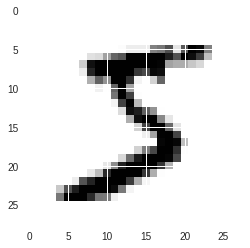

In [0]:
plt.imshow(images_X[0].reshape(28, 28), cmap=plt.cm.gray_r)

images_y[0]

In [0]:
# images_X缩放到0-1之间
images_X = images_X / 255.
 
# 二分像素（黑或白（
images_X = (images_X > 0.5).astype(float)
 
np.min(images_X), np.max(images_X)

(0.0, 1.0)

5.0

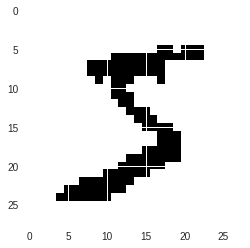

In [0]:
plt.imshow(images_X[0].reshape(28, 28), cmap=plt.cm.gray_r)
 
images_y[0]

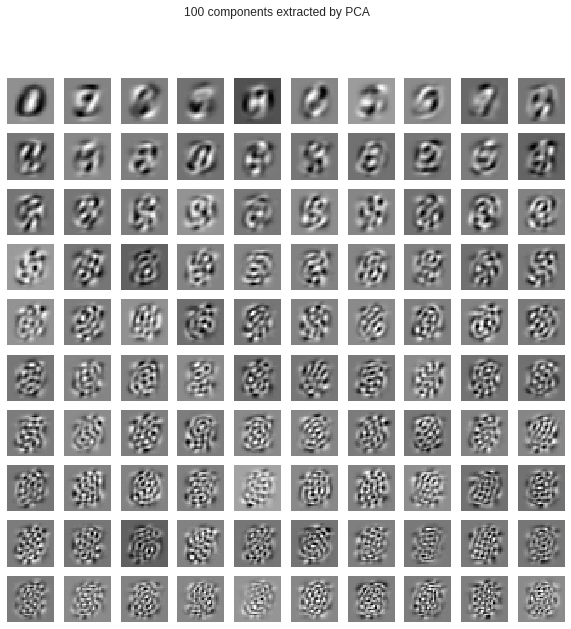

In [0]:
# 导入PCA模块
from sklearn.decomposition import PCA

# 100个主数字
pca = PCA(n_components=100)
pca.fit(images_X)

# 绘制100个特征
plt.figure(figsize=(10, 10))
for i, comp in enumerate(pca.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r)
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by PCA')

plt.show()

In [0]:
# 前30个特征捕捉64%的信息
 
pca.explained_variance_ratio_[:30].sum()

0.6374141378676752

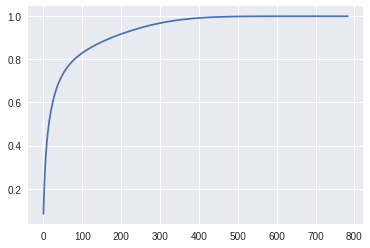

In [0]:
# 碎石图

# 所有的主数字
full_pca = PCA(n_components=784)
full_pca.fit(images_X)

plt.plot(np.cumsum(full_pca.explained_variance_ratio_))

# 100个特征包括90%的方差

In [0]:
# 用第一个拟合过的PCA对象对第一个图像进行转换 提取100个新特征
pca.transform(images_X[:1])

# 然后是矩阵乘法
np.dot(images_X[:1]-images_X.mean(axis=0), pca.components_.T)

array([[ 6.10905677e-01,  1.36377972e+00,  4.21703847e-01,
        -2.19662828e+00, -4.51810760e-01, -1.32049500e+00,
         7.94346796e-01,  3.05511270e-01,  1.22978988e+00,
        -7.20967881e-01,  8.16833092e-02, -1.91375613e+00,
        -2.54647324e+00, -1.62440647e+00,  6.71073094e-01,
         1.56355282e-01,  9.18311121e-01, -1.89817818e-01,
         1.30141849e+00,  1.57929680e+00,  9.90525411e-01,
         1.12794257e-01,  1.07341071e+00,  7.01389281e-01,
        -3.59057626e-01,  1.66588962e-01,  9.93051716e-01,
        -7.31175365e-01,  8.69672725e-01, -1.86313328e-01,
        -7.25062534e-01,  1.12445354e-01,  1.61012905e-01,
         7.31765031e-02,  1.17453083e-01, -7.30513027e-01,
        -2.96896585e-01,  1.73094626e-01,  2.98567563e-01,
         2.32456400e+00, -2.03821387e-01, -8.53664292e-01,
         6.76499207e-01,  3.48128576e-01,  3.39376137e-01,
        -4.21462761e-01, -2.07528470e-01,  3.94624326e-01,
        -3.14789871e-01,  3.85011036e-01,  6.50372019e-0

In [0]:
# 实例化BernoulliRBM
# 设置random_state 固定权重和误差
# verbose是True 观看训练
# n_iter是传递次数
# n_components和PCA和LDA一样 我们希望创建的特征数
# n_components可以是任意整数 小于 等于或大于原始的特征均可

rbm = BernoulliRBM(random_state=0, verbose=True, n_iter=20, n_components=100)

In [0]:
rbm.fit(images_X)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -138.59, time = 1.20s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -120.25, time = 1.43s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -116.46, time = 1.68s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -123.87, time = 1.68s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -113.27, time = 1.68s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -111.13, time = 1.67s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -120.57, time = 1.67s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -105.62, time = 1.67s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -111.34, time = 1.67s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -110.78, time = 1.67s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -106.90, time = 1.67s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -110.21, time = 1.67s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -107.15, time = 1.67s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -111.54, time = 1.68s
[BernoulliRBM] 

BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=100, n_iter=20,
       random_state=0, verbose=True)

In [0]:
# RBM也有components_
len(rbm.components_)

100

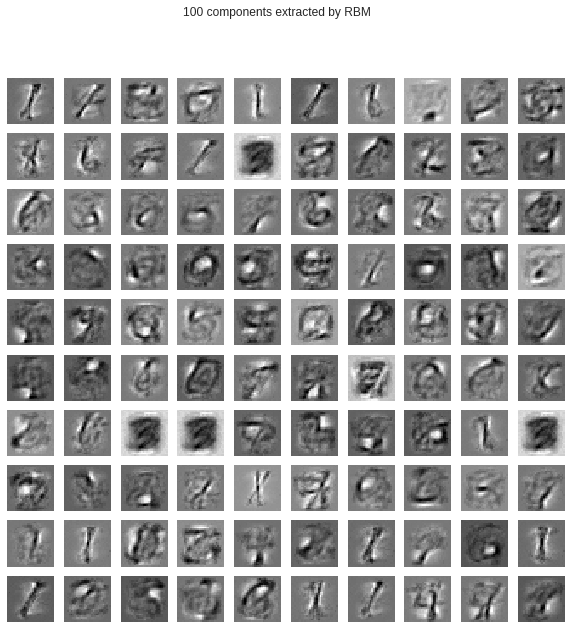

In [0]:
# 绘制RBM组件（新特征的表示）
plt.figure(figsize=(10, 10))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r)
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by RBM')

plt.show()

In [0]:
# 好像有些特征一样
# 但是其实所有的特征都不一样（虽然有的很类似）
np.unique(rbm.components_.mean(axis=1)).shape

(100,)

In [0]:
# 用波尔茨曼机转换数字5

image_new_features = rbm.transform(images_X[:1]).reshape(100,)

image_new_features

array([3.22896402e-16, 4.73424521e-16, 1.07760484e-14, 1.14197817e-11,
       2.24207141e-20, 3.11378129e-15, 4.41417116e-09, 5.60982260e-09,
       7.00165390e-13, 1.00250299e-09, 1.76801421e-11, 7.35640063e-04,
       1.44553782e-28, 1.33441566e-15, 1.00000000e+00, 9.99171753e-01,
       2.02229424e-17, 6.47825140e-16, 5.59342809e-06, 2.52245918e-06,
       6.83478246e-08, 9.99999985e-01, 2.20306584e-12, 1.74145819e-04,
       2.37414932e-06, 6.67736313e-16, 1.33689814e-05, 1.20580851e-02,
       9.99978604e-01, 9.99999565e-01, 9.74466206e-01, 3.38822808e-08,
       3.38547991e-10, 2.91504968e-11, 1.00000000e+00, 3.63403560e-21,
       1.55737302e-13, 2.14680016e-12, 7.77967595e-04, 1.76826290e-14,
       5.07699314e-14, 9.99775239e-01, 2.00457199e-05, 3.87187845e-08,
       1.12349421e-04, 1.02456097e-03, 5.42170147e-12, 6.44395859e-16,
       1.57232971e-02, 9.87764947e-01, 1.27563156e-24, 9.95662025e-20,
       4.82826576e-15, 3.08382944e-12, 7.58413201e-18, 3.33971301e-12,
      

In [0]:
# 不是简单的矩阵乘法
# 是神经网络 几个矩阵乘法 转换特征
np.dot(images_X[:1]-images_X.mean(axis=0), rbm.components_.T)

array([[-3.08142056e+00, -1.08561683e+01, -1.46386276e+01,
         3.45431093e+00, -8.59178304e+00, -2.84961652e+00,
         2.57681992e+00, -3.05629414e+01, -7.34817216e-01,
        -1.20588022e+01, -4.00016628e+00,  2.11959102e+01,
        -3.23590605e+01, -5.83262970e+00,  9.02359423e+00,
         1.93847477e+01, -3.43092025e+00, -3.46361787e+00,
         8.78246018e+00, -4.10009205e+00, -1.09983897e+01,
         2.63518916e+01, -1.28180683e+01,  1.02922526e+01,
         8.55945835e+00, -3.88328824e+00,  6.83288851e+00,
         1.94917141e+01,  2.39911225e+01,  9.51404295e+00,
         7.67616140e+00, -3.74729691e+00, -2.03168360e+01,
         4.84926874e+00,  4.51297634e+01, -2.51702364e+01,
        -1.19996901e+01,  1.23086427e+01, -9.47567674e-01,
        -4.44978759e+01, -2.08072043e+01,  2.16437923e+01,
        -7.08380201e+00, -1.07614516e+01, -2.57963998e+00,
         1.65622976e+01, -8.30552040e+00, -1.45799533e+01,
        -7.95246563e-03,  2.32796136e+01, -3.40773093e+0

In [0]:
# 最有代表性的特征
top_features = image_new_features.argsort()[-20:][::-1]

print(top_features)
image_new_features[top_features]

[63 62 69 14 34 56 83 21 29 82 28 92 41 15 49 66 30 79 77 94]


array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99999999, 0.99999956, 0.99999315,
       0.9999786 , 0.99987813, 0.99977524, 0.99917175, 0.98776495,
       0.97600556, 0.97446621, 0.94470164, 0.93149911, 0.4948913 ])

Text(0.5,0.98,'Top 20 components extracted by RBM for first digit')

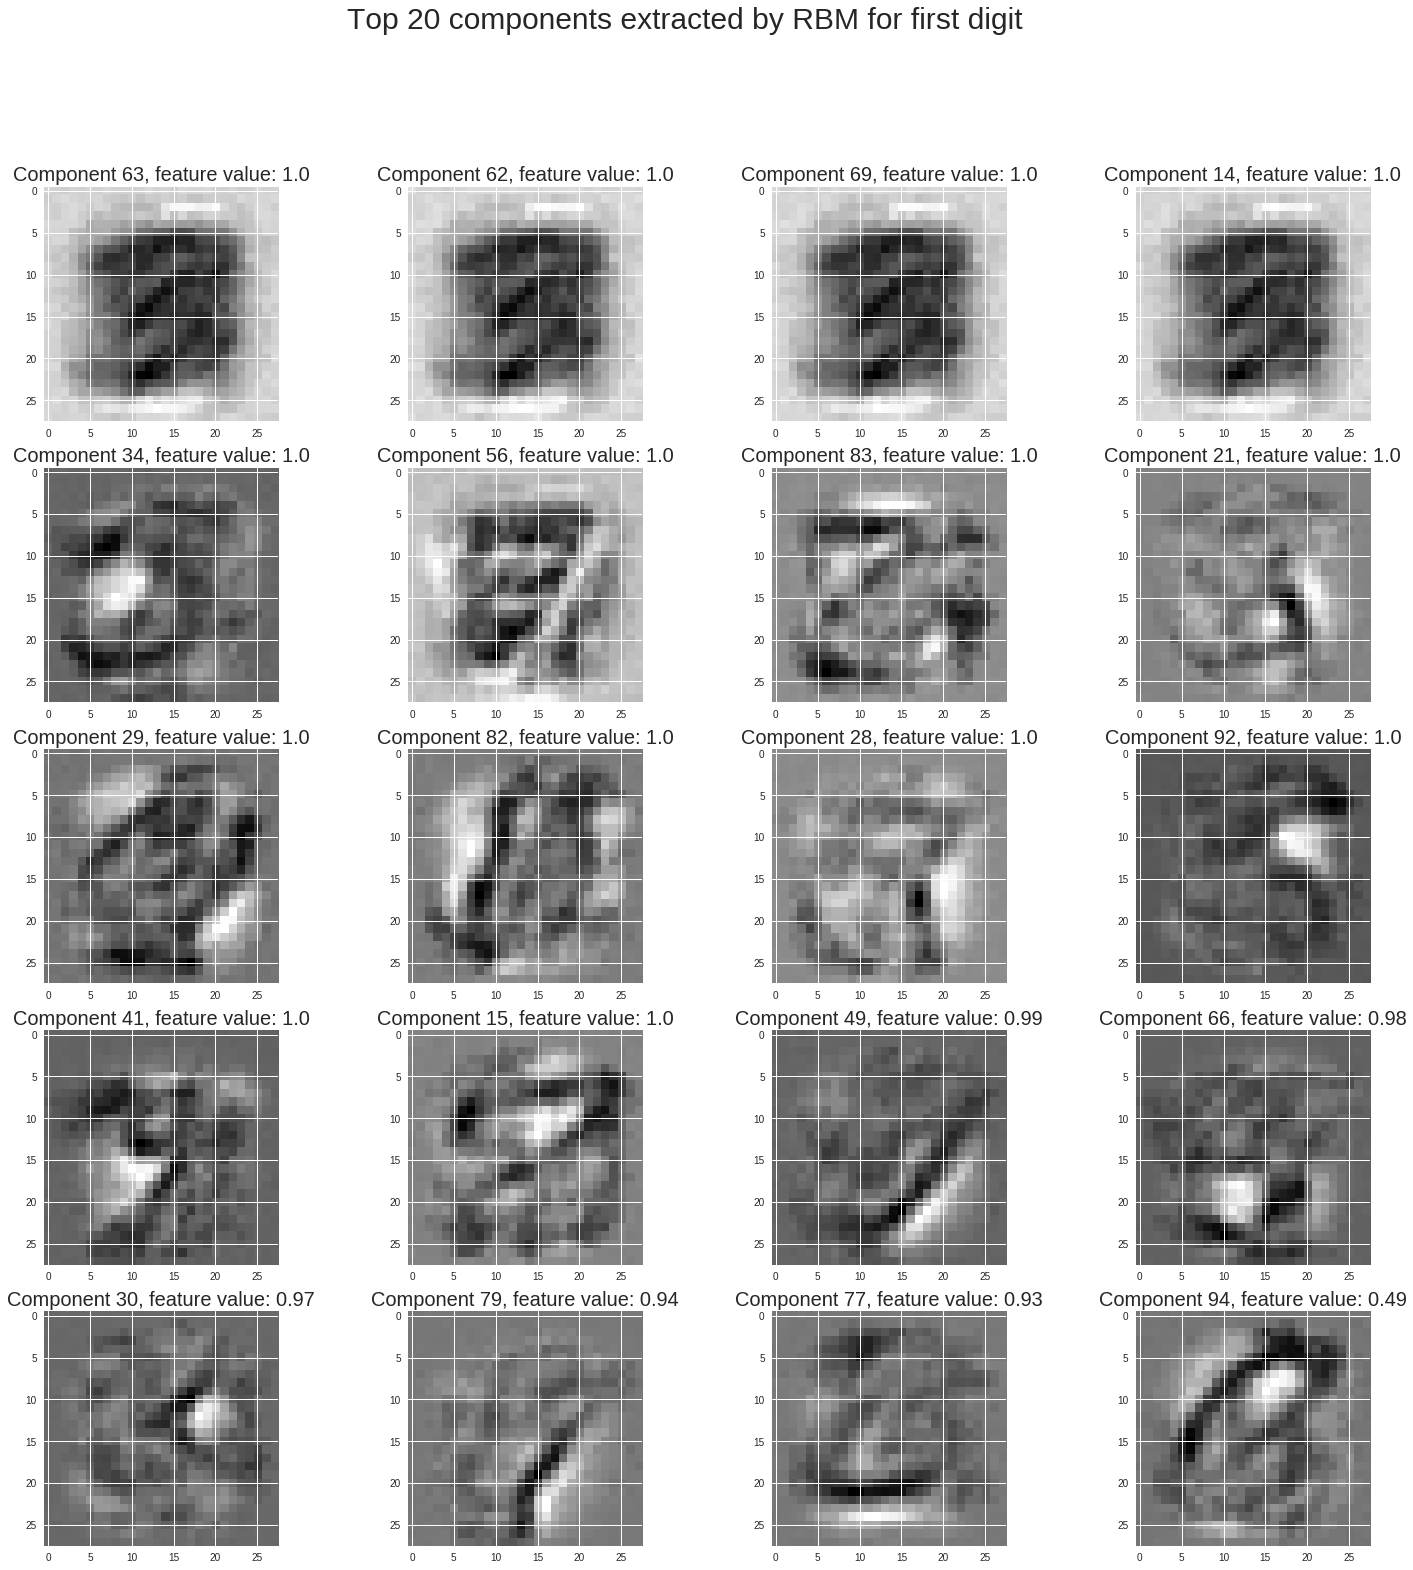

In [0]:
# 绘制最有代表性的RBM特征（新特征）
plt.figure(figsize=(25, 25))
for i, comp in enumerate(top_features):
    plt.subplot(5, 4, i + 1)
    plt.imshow(rbm.components_[comp].reshape((28, 28)), cmap=plt.cm.gray_r)
    plt.title("Component {}, feature value: {}".format(comp, round(image_new_features[comp], 2)), fontsize=20)
plt.suptitle('Top 20 components extracted by RBM for first digit', fontsize=30)

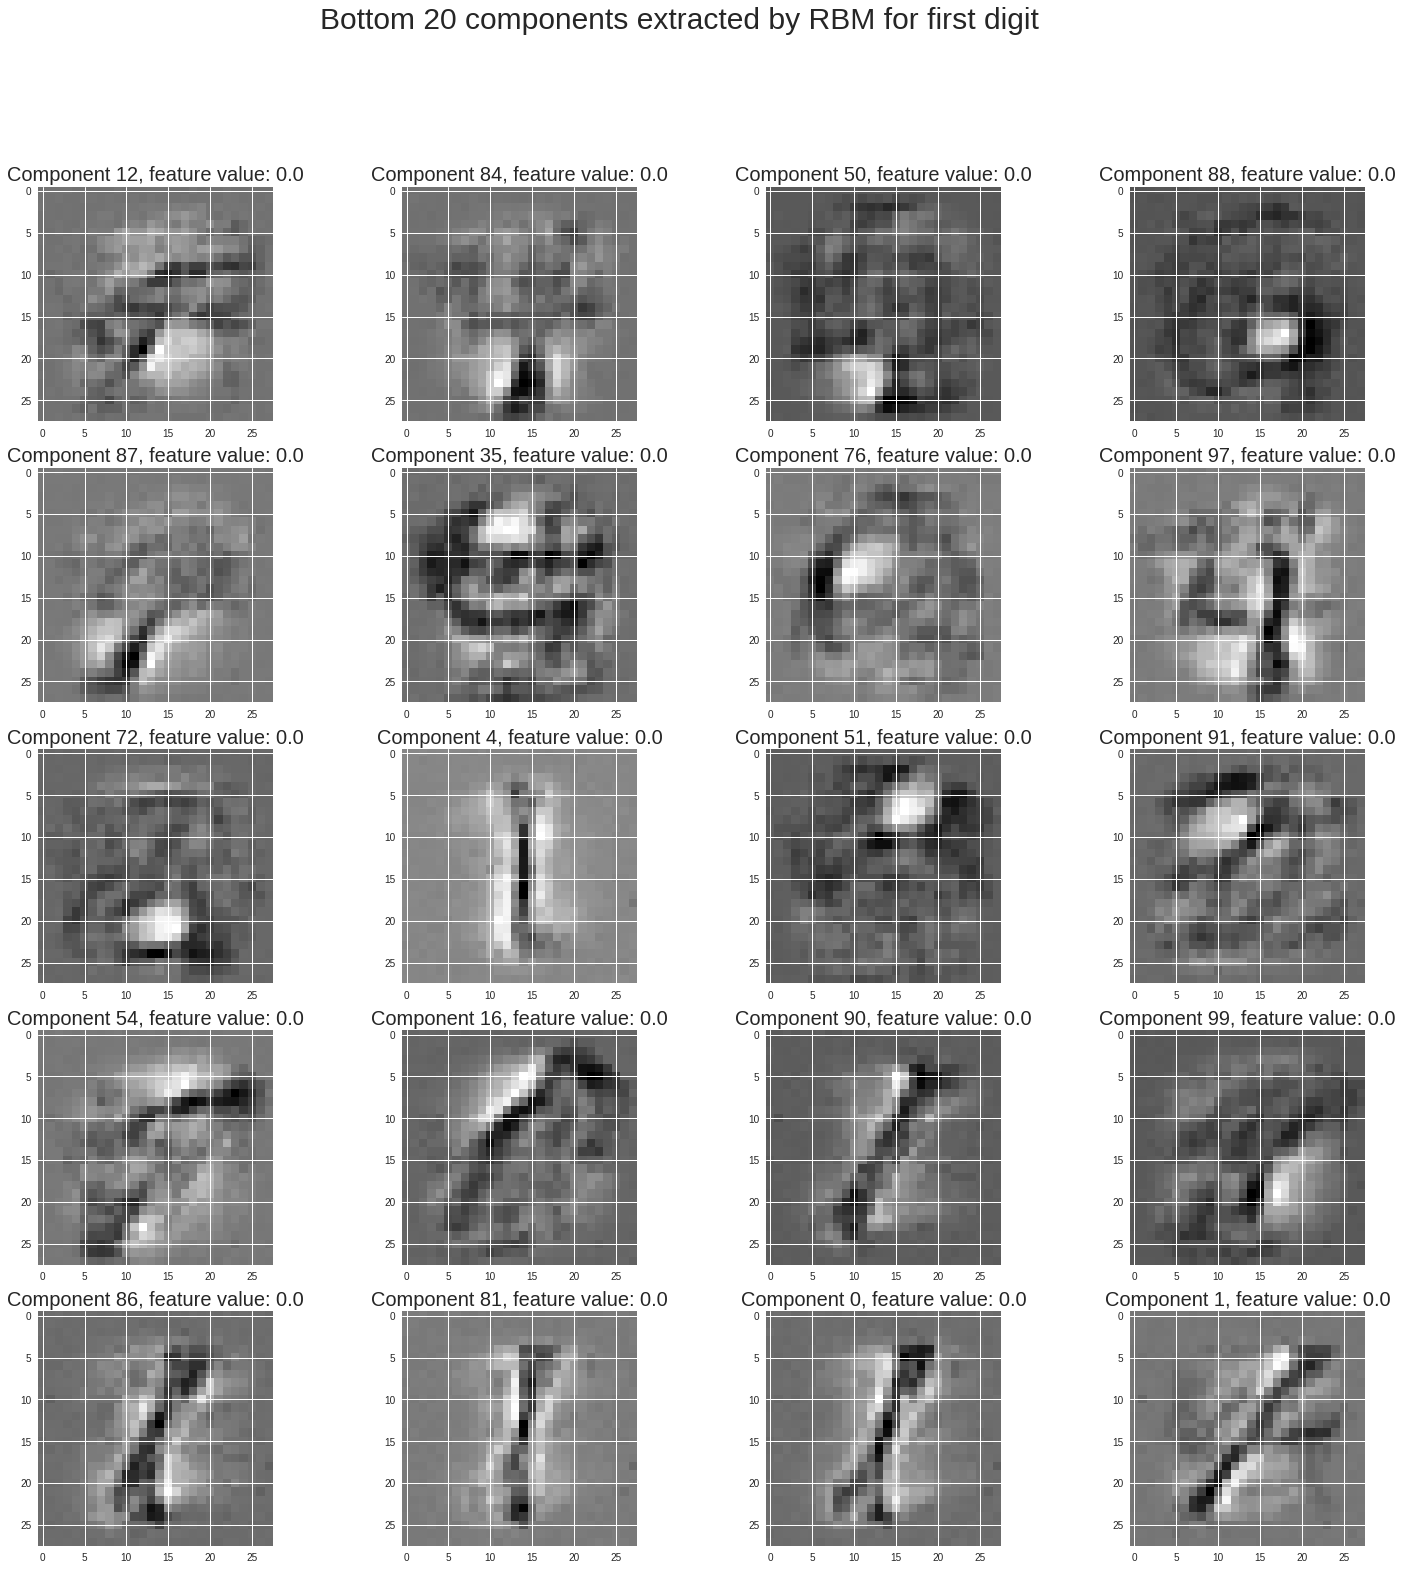

In [0]:
# 最差的特征
bottom_features = image_new_features.argsort()[:20]

plt.figure(figsize=(25, 25))
for i, comp in enumerate(bottom_features):
    plt.subplot(5, 4, i + 1)
    plt.imshow(rbm.components_[comp].reshape((28, 28)), cmap=plt.cm.gray_r)
    plt.title("Component {}, feature value: {}".format(comp, round(image_new_features[comp], 2)), fontsize=20)
plt.suptitle('Bottom 20 components extracted by RBM for first digit', fontsize=30)

plt.show()

In [0]:
# 导入逻辑回归和网格搜索

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 创建逻辑回归
lr = LogisticRegression()
params = {'C':[1e-2, 1e-1, 1e0, 1e1, 1e2]}

# 实例化网格搜索类
grid = GridSearchCV(lr, params)

In [0]:
# 拟合数据
grid.fit(images_X, images_y)

# 最佳参数
grid.best_params_, grid.best_score_

({'C': 0.1}, 0.8908333333333334)

In [0]:
# 用PCA提取特征

lr = LogisticRegression()
pca = PCA()

params = {'clf__C':[1e-1, 1e0, 1e1],
         'pca__n_components': [10, 100, 200]}

# 创建流水线
pipeline = Pipeline([('pca', pca), ('clf', lr)])

# 实例化网格搜索
grid = GridSearchCV(pipeline, params)

In [0]:
# 拟合数据
grid.fit(images_X, images_y)

# 最佳参数
grid.best_params_, grid.best_score_

({'clf__C': 10.0, 'pca__n_components': 100}, 0.8876666666666667)

In [0]:
# 用RBM学习特征

rbm = BernoulliRBM(random_state=0)

params = {'clf__C':[1e-1, 1e0, 1e1],
          'rbm__n_components': [100, 200]
         }

# 流水线
pipeline = Pipeline([('rbm', rbm), ('clf', lr)])

# 网格搜索
grid = GridSearchCV(pipeline, params)

In [0]:
# 拟合数据
grid.fit(images_X, images_y)

# 最佳参数
grid.best_params_, grid.best_score_

({'clf__C': 1.0, 'rbm__n_components': 200}, 0.9156666666666666)

In [0]:
# 词向量的例子
king = np.array([.2, -.5, .7, .2, -.9])
man = np.array([-.5, .2, -.2, .3, 0.])
woman = np.array([.7, -.3, .3, .6, .1])

queen = np.array([ 1.4, -1. , 1.2, 0.5, -0.8])

In [0]:
np.array_equal((king - man + woman), queen)

True

In [0]:
! pip install gensim

    100% |████████████████████████████████| 23.5MB 1.8MB/s 
    100% |████████████████████████████████| 1.4MB 13.9MB/s 
    100% |████████████████████████████████| 133kB 12.6MB/s 
    100% |████████████████████████████████| 4.4MB 8.3MB/s 
    100% |████████████████████████████████| 61kB 18.6MB/s 
    100% |████████████████████████████████| 552kB 18.6MB/s 
  Running setup.py bdist_wheel for smart-open ... - \ done
  Stored in directory: /content/.cache/pip/wheels/73/f1/9b/ccf93d4ba073b6f79b1ed9df68ab5ce048d8136d0efcf90b30
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /content/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [0]:
!pip3 install gensim

You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [0]:
# 导入gensim包
import gensim

In [0]:
import logging
 
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [19]:
! wget https://raw.githubusercontent.com/PacktPublishing/Feature-Engineering-Made-Easy/master/Chapter07/text8

--2018-12-26 01:55:59--  https://raw.githubusercontent.com/PacktPublishing/Feature-Engineering-Made-Easy/master/Chapter07/text8
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100000000 (95M) [text/plain]
Saving to: ‘text8’

text8               100%[===================>]  95.37M   149MB/s    in 0.6s    

2018-12-26 01:56:02 (149 MB/s) - ‘text8’ saved [100000000/100000000]



In [0]:
from gensim.models import word2vec, Word2Vec
 
sentences = word2vec.Text8Corpus('text8')

In [0]:
# 实例化gensim模块
# min-count是忽略次数比它小的词
# size是要学习的词的维数
model = gensim.models.Word2Vec(sentences, min_count=1, size=20)

2018-12-26 01:56:05,415 : INFO : collecting all words and their counts
2018-12-26 01:56:05,423 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-12-26 01:56:10,896 : INFO : collected 253854 word types from a corpus of 17005207 raw words and 1701 sentences
2018-12-26 01:56:10,898 : INFO : Loading a fresh vocabulary
2018-12-26 01:56:11,932 : INFO : effective_min_count=1 retains 253854 unique words (100% of original 253854, drops 0)
2018-12-26 01:56:11,934 : INFO : effective_min_count=1 leaves 17005207 word corpus (100% of original 17005207, drops 0)
2018-12-26 01:56:12,738 : INFO : deleting the raw counts dictionary of 253854 items
2018-12-26 01:56:12,747 : INFO : sample=0.001 downsamples 36 most-common words
2018-12-26 01:56:12,748 : INFO : downsampling leaves estimated 12819131 word corpus (75.4% of prior 17005207)
2018-12-26 01:56:13,804 : INFO : estimated required memory for 253854 words and 20 dimensions: 167543640 bytes
2018-12-26 01:56:13,806 : INFO :

In [0]:
# 单个词的嵌入
model.wv['king']

array([ 2.6620657 , -3.974497  ,  2.4880247 ,  2.5587156 ,  5.0986204 ,
       -2.4971821 ,  0.24515167, -2.5186718 , -8.051198  ,  0.8541352 ,
       -0.7393502 ,  1.7630918 ,  3.254201  ,  3.4053195 ,  0.05014901,
       -0.79779804,  1.029443  ,  0.49147558,  4.3839474 , -3.0628905 ],
      dtype=float32)

In [0]:
# woman + king - man = queen
model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=10)

2018-07-23 06:16:32,263 : INFO : precomputing L2-norms of word weight vectors
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('emperor', 0.9074590802192688),
 ('prince', 0.8870657682418823),
 ('son', 0.8770213723182678),
 ('pope', 0.8674956560134888),
 ('empress', 0.8565405607223511),
 ('throne', 0.8549439907073975),
 ('viii', 0.8538877964019775),
 ('elector', 0.8526860475540161),
 ('spellman', 0.8513941764831543),
 ('sons', 0.850284993648529)]

In [0]:
# 伦敦对于英国相当于巴黎对于____
model.wv.most_similar(positive=['Paris', 'England'], negative=['London'], topn=1)

In [0]:
!wget https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz

--2018-07-23 06:22:38--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.230.237
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.230.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

300.bin.gz           55%[==========>         ] 868.61M  24.9MB/s    eta 35s    

GoogleNews-vectors- 100%[===================>]   1.53G   103MB/s    in 53s     

2018-07-23 06:23:31 (29.8 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [0]:
!tar zxvf GoogleNews-vectors-negative300.bin.gz

tar: This does not look like a tar archive
tar: Skipping to next header
tar: Substituting `.' for empty member name

tar: .: Cannot open: Is a directory
tar: Skipping to next header
tar: Substituting `.' for empty member name

tar: .: Cannot open: Is a directory
tar: Skipping to next header
tar: Substituting `.' for empty member name

tar: .: Cannot open: Is a directory
tar: Skipping to next header
tar: Substituting `.' for empty member name

tar: .: Cannot open: Is a directory
tar: Skipping to next header
tar: Substituting `.' for empty member name

tar: .: Cannot open: Is a directory
tar: Skipping to next header
tar: Substituting `.' for empty member name

tar: .: Cannot open: Is a directory
tar: Skipping to next header
tar: Substituting `.' for empty member name

tar: .: Cannot open: Is a directory
tar: Skipping to next header
tar: Substituting `.' for empty member name

tar: .: Cannot open: Is a directory
tar: Skipping to next header
tar: Archive contains ‘\0\017>\0\0ý\0\0D\276’ wh

In [9]:
!wget -O googlenewsvectorsnegative300.zip "https://storage.googleapis.com/kaggle-datasets/6763/9801/googlenewsvectorsnegative300.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1532586314&Signature=mawXUz1%2BMdaEUIvrR%2Btj%2FShPwtS9d1%2FVrU9MKEwszQUATcAGCGEIKY2vZ2LeCInLcmJfU8XVV%2Bp0QFQyDyUJvGFZq1jTuBrbFmG9%2BrCjSjYmv7DIYwg7tDtj%2FGEOrPbHHOLScNuHedodgzmeBcsSRJ2rKMdMhiIOG3dJUzbIzHBqgnv9YFRoM9uQLsh2CPbZJ5WIOuTODLw0AMfs3j%2ByZUec8WgCbJw21xZSTh3508cSq205i%2F17%2F8Y5L9cPPlmPxxhvCeKyTnueoKjtcdMPVMWrlvFI5wRxjGelpkcpctyzYVSB4RL9mcJfY36DzqtIhjGB7cCbA1ohqZ2e7y%2Fymw%3D%3D"

--2018-12-26 01:55:13--  https://storage.googleapis.com/kaggle-datasets/6763/9801/googlenewsvectorsnegative300.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1532586314&Signature=mawXUz1%2BMdaEUIvrR%2Btj%2FShPwtS9d1%2FVrU9MKEwszQUATcAGCGEIKY2vZ2LeCInLcmJfU8XVV%2Bp0QFQyDyUJvGFZq1jTuBrbFmG9%2BrCjSjYmv7DIYwg7tDtj%2FGEOrPbHHOLScNuHedodgzmeBcsSRJ2rKMdMhiIOG3dJUzbIzHBqgnv9YFRoM9uQLsh2CPbZJ5WIOuTODLw0AMfs3j%2ByZUec8WgCbJw21xZSTh3508cSq205i%2F17%2F8Y5L9cPPlmPxxhvCeKyTnueoKjtcdMPVMWrlvFI5wRxjGelpkcpctyzYVSB4RL9mcJfY36DzqtIhjGB7cCbA1ohqZ2e7y%2Fymw%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.15.128, 2a00:1450:400c:c0c::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.15.128|:443... connected.
HTTP request sent, awaiting response... 400 Bad Request
2018-12-26 01:55:13 ERROR 400: Bad Request.



In [10]:
!unzip googlenewsvectorsnegative300.zip

Archive:  googlenewsvectorsnegative300.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of googlenewsvectorsnegative300.zip or
        googlenewsvectorsnegative300.zip.zip, and cannot find googlenewsvectorsnegative300.zip.ZIP, period.


In [0]:
!gunzip GoogleNews-vectors-negative300.bin.gz

In [11]:
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

NameError: ignored

In [0]:
len(model.wv.vocab)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


3000000

In [0]:
# woman + king - man = queen
model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
2018-07-23 06:32:58,124 : INFO : precomputing L2-norms of word weight vectors
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('queen', 0.7118192911148071)]

In [0]:
# 伦敦对于英国相当于巴黎对于____
model.wv.most_similar(positive=['Paris', 'England'], negative=['London'], topn=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('France', 0.667637825012207)]

In [0]:
# 不属于类别的单词
model.wv.doesnt_match("duck bear cat tree".split())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'tree'

In [0]:
# 0-1间的相似性分数

# 女和男的相似程度 比较相似
model.wv.similarity('woman', 'man')

# 树和男的相似度 不大类似
model.wv.similarity('tree', 'man')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


0.22937459

In [0]:
# 查找词嵌入 没有返回None
def get_embedding(string):
    try:
        return model.wv[string]
    except:
        return None


In [0]:
# 原创标题
sentences = [
 "this is about a dog",
 "this is about a cat",
 "this is about nothing"
]

In [0]:
import numpy as np
from functools import reduce

In [6]:
# 3x300的零矩阵
vectorized_sentences = np.zeros((len(sentences),300))
# 每个句子
for i, sentence in enumerate(sentences):
    # 分词
    words = sentence.split(' ')
    # 进行词嵌入
    embedded_words = [get_embedding(w) for w in words]
    embedded_words = filter(lambda x:x is not None, embedded_words)
    # 对标题进行矢量化 取均值
    vectorized_sentence = reduce(lambda x,y:x+y, embedded_words)/len(list(embedded_words))
    # 改成矢量
    vectorized_sentences[i:] = vectorized_sentence

TypeError: ignored

In [0]:
vectorized_sentences.shape

(3, 300)

In [0]:
# 最和狗接近的句子
reference_word = 'dog'
 
# 词嵌入和向量化矩阵的点积
best_sentence_idx = np.dot(vectorized_sentences, get_embedding(reference_word)).argsort()[-1]
 
# 最相关的句子
sentences[best_sentence_idx]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


'this is about nothing'

In [0]:
reference_word = 'cat'
best_sentence_idx = np.dot(vectorized_sentences, get_embedding(reference_word)).argsort()[-1]
 
sentences[best_sentence_idx]

In [0]:
 sentences = """How to Sound Like a Data Scientist
 Types of Data
 The Five Steps of Data Science
 Basic Mathematics
 A Gentle Introduction to Probability
 Advanced Probability
 Basic Statistics
 Advanced Statistics
 Communicating Data
 Machine Learning Essentials
 Beyond the Essentials
 Case Studies """.split('\n')

In [0]:
# 3x300的零矩阵
vectorized_sentences = np.zeros((len(sentences),300))
# 每个句子
for i, sentence in enumerate(sentences):
    # 分词
    words = sentence.split(' ')
    # 进行词嵌入
    embedded_words = [get_embedding(w) for w in words]
    embedded_words = filter(lambda x:x is not None, embedded_words)
    # 对标题进行矢量化 取均值
    vectorized_sentence = reduce(lambda x,y:x+y, embedded_words)/len(list(embedded_words))
    # 改成矢量
    vectorized_sentences[i:] = vectorized_sentence

In [0]:
vectorized_sentences.shape

In [0]:
reference_word = 'math'
best_sentence_idx = np.dot(vectorized_sentences, get_embedding(reference_word)).argsort()[-3:][::-1]
 
[sentences[b] for b in best_sentence_idx]

In [0]:
# 关于数据的演讲
reference_word = 'talk'
best_sentence_idx = np.dot(vectorized_sentences, get_embedding(reference_word)).argsort()[-3:][::-1]
 
[sentences[b] for b in best_sentence_idx]

In [0]:
#关于AI
reference_word = 'AI'
best_sentence_idx = np.dot(vectorized_sentences, get_embedding(reference_word)).argsort()[-3:][::-1]
 
[sentences[b] for b in best_sentence_idx]